In [11]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
from wordcloud import WordCloud, STOPWORDS

In [96]:
stopwords = set(STOPWORDS)
election_stopwords_filename = 'sources/election_stopwords.txt'

with open(election_stopwords_filename) as f_stopwords:
    for line in f_stopwords:
        stopwords.add(line.strip('\n'))

In [97]:
SOURCE_FOLDER = 'processed_text'

In [114]:
data = []
for filename in os.listdir(SOURCE_FOLDER):
    if filename[0] == '.':
        continue
        
    split_filename = filename.strip('.txt').split('_')
    company, date, idx = split_filename

    if date != '':
        month, day, year = date.split('-')
        year = '20' + year
        
        filename_with_path = SOURCE_FOLDER + '/' + filename

        with open(filename_with_path) as f:
            text = f.read()
            d = {}
            for word in text.split(' '):
                if word not in stopwords:
                    data.append([word, year, year + '-' + month])                        
                    

In [115]:
df = pd.DataFrame(data, columns=['word', 'year', 'month'])

In [116]:
df.count()

word     130251
year     130251
month    130251
dtype: int64

In [118]:
text_by_year = {}
for _, row in df.iterrows():
    text_by_year[row['year']] = text_by_year.get(row['year'], '') + ' ' + row['word']

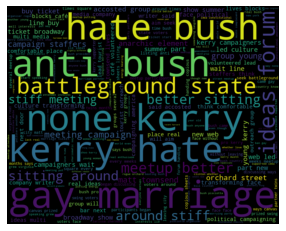

In [119]:
for year, text in text_by_year.items():
    wordcloud_year = WordCloud(width=1000, height=800, stopwords=stopwords).generate(text)
    plt.imshow(wordcloud_year, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(fname='wordcloud_' + str(year) + '.png', dpi=600)